# **Conjunto de dados de vendas de videogames** <p>
Dados de vendas e classificações de jogos de videogame extraídos do VzCharts

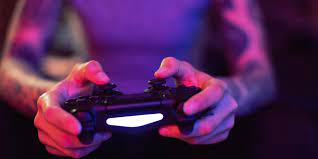

Baixar os Dados
[Link da Kaggle para baixar os Dados](https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount) <p>
Utilizar o arquivo: "PS4_GamesSales.csv"

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
base_dados = pd.read_csv(r"C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\PS4_GamesSales.csv", encoding='latin-1')
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
base_dados.shape

(1034, 9)

In [4]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [5]:
# Campos nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

<Axes: >

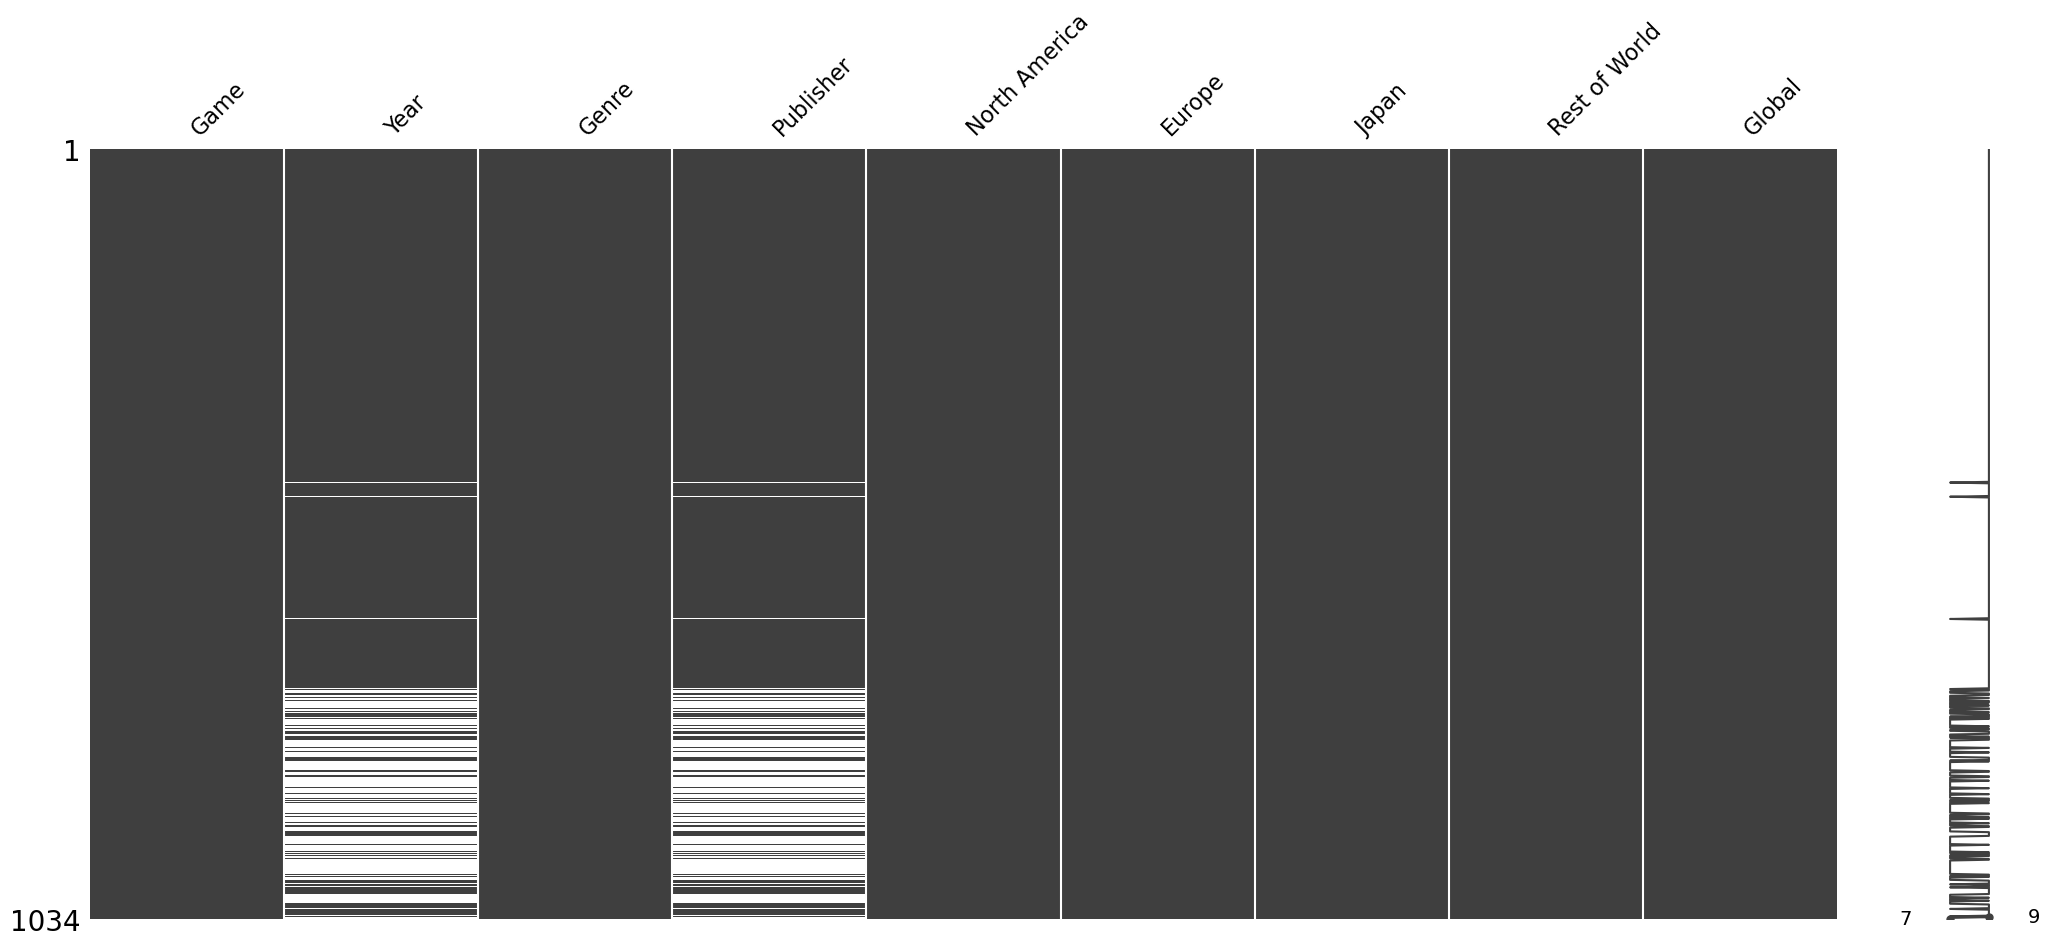

In [6]:
missingno.matrix(base_dados)

In [7]:
# Retirando os valores nulos
base_dados = base_dados.dropna()
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


In [8]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [9]:
colunas = list(base_dados.columns)
colunas


['Game',
 'Year',
 'Genre',
 'Publisher',
 'North America',
 'Europe',
 'Japan',
 'Rest of World',
 'Global']

In [10]:
colunas_formatadas = []
for i in range(0, len(colunas)):
    nome_formatado = colunas[i].lower().replace(" ", "_")
    colunas_formatadas.append(nome_formatado)

print("***")
colunas_formatadas

***


['game',
 'year',
 'genre',
 'publisher',
 'north_america',
 'europe',
 'japan',
 'rest_of_world',
 'global']

In [11]:
colunas

['Game',
 'Year',
 'Genre',
 'Publisher',
 'North America',
 'Europe',
 'Japan',
 'Rest of World',
 'Global']

In [12]:
base_dados.columns = colunas_formatadas
base_dados.head()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [13]:
base_dados.describe()

,year,north_america,europe,japan,rest_of_world,global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


## Analisar o valor de venda ao longo dos anos

Text(0, 0.5, 'Quantidade de vendas (MM)')

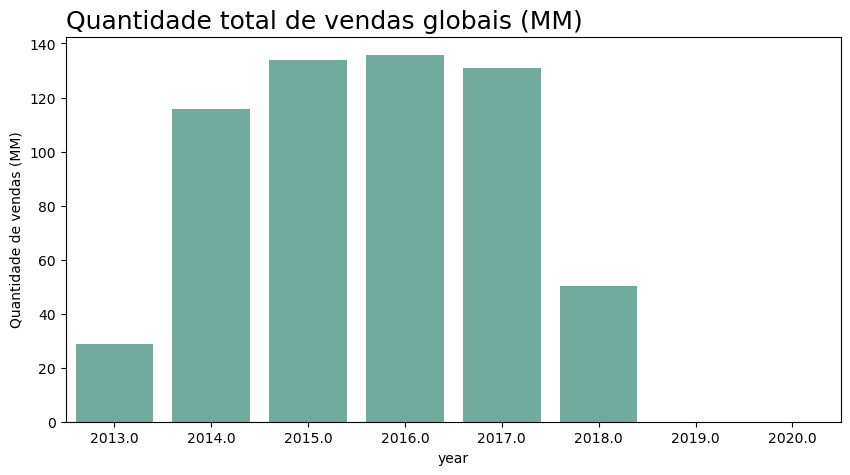

In [14]:
# tamanho da imagem
plt.figure(figsize=(10,5))

# título
plt.title('Quantidade total de vendas globais (MM)', loc='left', fontsize=18)

# gráfico
sns.barplot(data=base_dados, x='year', y='global', ci=None, color='#69b3a2', estimator=sum)

# label
plt.ylabel('Quantidade de vendas (MM)')

In [15]:
# Retirar os anos que não possuem valores

base_dados = base_dados.loc[(base_dados['year'] != 2019) & (base_dados['year'] != 2020)]
base_dados.head()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


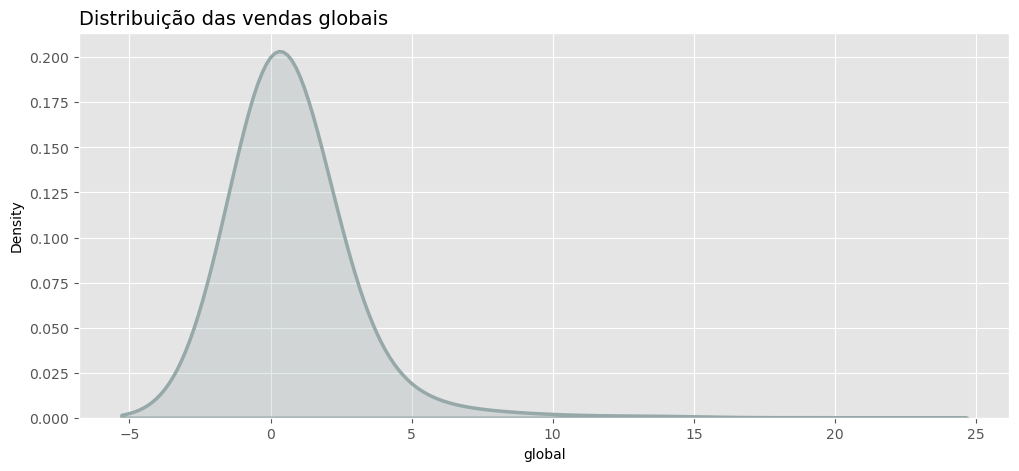

In [16]:
# Plotando a distribuição do valor global

# Tamanho da imagem
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Título
plt.title('Distribuição das vendas globais', loc='left', fontsize=14)

sns.kdeplot(base_dados['global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [17]:
base_dados.groupby(by=['year']).sum()

,north_america,europe,japan,rest_of_world,global
year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


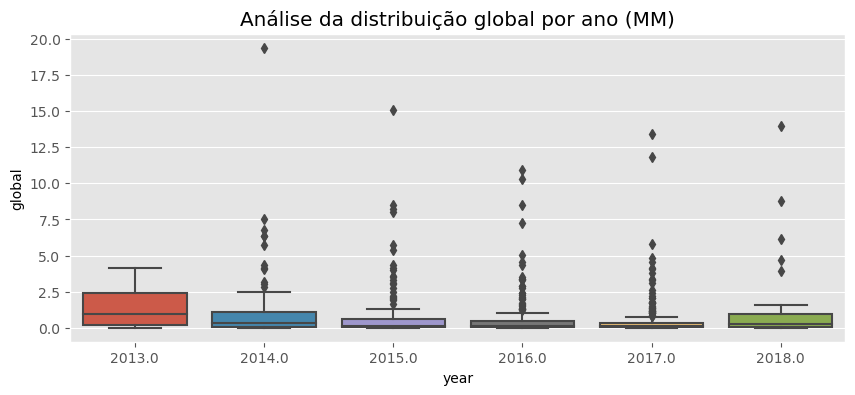

In [18]:
# Boxplot --> Queremos fazer o boxplot para identificar os valores outliers.

# Tamanho da imagem
plt.figure(figsize=(10,4))

# Título
plt.title('Análise da distribuição global por ano (MM)')

sns.boxplot(data=base_dados, x='year', y='global');

In [19]:
base_dados.loc[base_dados['global'] >= 10]

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [20]:
base_dados

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [21]:
# Qual a participação de cada continente no valor global de cada jogo? (Queremos fazer um gráfico de barra empilhadas)

In [22]:
analise = base_dados.groupby(by=['year']).sum()
analise.head()

,north_america,europe,japan,rest_of_world,global
year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90


In [23]:
# Vamos ter que criar quatro listas contendo a informação do percentual de participação de cada continente nas vendas totais por ano.

america = []
for valor_north_america, valor_total in zip(analise['north_america'], analise['global']):
    america.append((valor_north_america / valor_total) * 100)

europe = []
for valor_europe, valor_total in zip(analise['europe'], analise['global']):
    europe.append((valor_europe / valor_total) * 100)
    
japan = []
for valor_japan, valor_total in zip(analise['japan'], analise['global']):
    japan.append((valor_japan / valor_total) * 100)
    
world = []
for valor_world, valor_total in zip(analise['rest_of_world'], analise['global']):
    world.append((valor_world / valor_total) * 100)
    
america, europe, japan, world

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

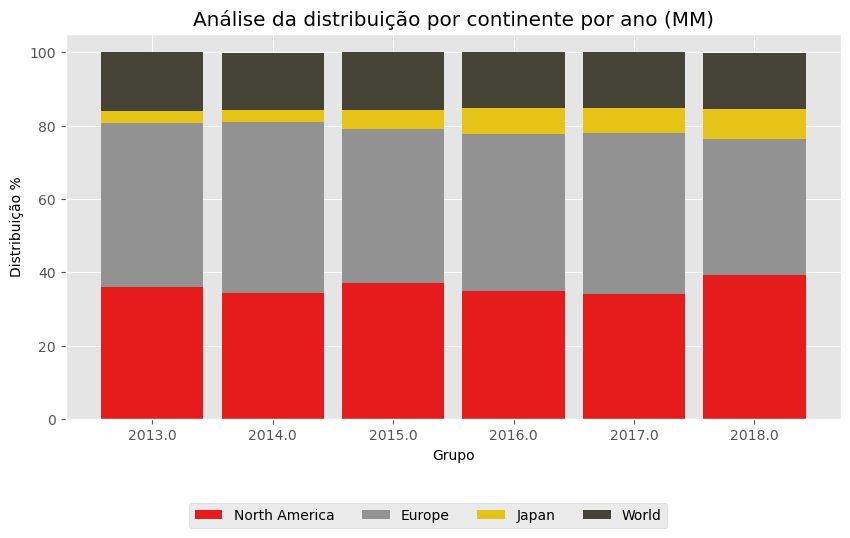

In [24]:
# Tamanho da imagem
plt.figure(figsize=(10,5))

# Largura da barra no gráfico
largura_barra = 0.85
rotulos = analise.index
grupos = [0, 1, 2, 3, 4, 5]

# Título
plt.title('Análise da distribuição por continente por ano (MM)')

# Plot da américa
plt.bar(grupos, america, width=largura_barra, color='#E61C1C')

# Plot da Europa
plt.bar(grupos, europe, bottom=america, width=largura_barra, color='#929292')

# Plot do Japão
plt.bar(grupos, japan, bottom=[a+b for a, b in zip(america, europe)], width=largura_barra, color='#E6C317')

# Plot do resto do mundo
plt.bar(grupos, world, bottom=[a+b+c for a, b, c in zip(america, europe, japan)], width=largura_barra, color='#464337')

# Labels
plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['North America', 'Europe', 'Japan', 'World'], loc='upper left', bbox_to_anchor=(0.15, -0.2), ncol=4)

In [25]:
base_dados['publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [26]:
from sklearn.preprocessing import LabelEncoder

funcao_label = LabelEncoder()

base_dados['produtor'] = funcao_label.fit_transform(base_dados['publisher'])
base_dados['genero'] = funcao_label.fit_transform(base_dados['genre'])
base_dados['jogo'] = funcao_label.fit_transform(base_dados['game'])
base_dados.head()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global,produtor,genero,jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [27]:
# Paleta de cores

paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

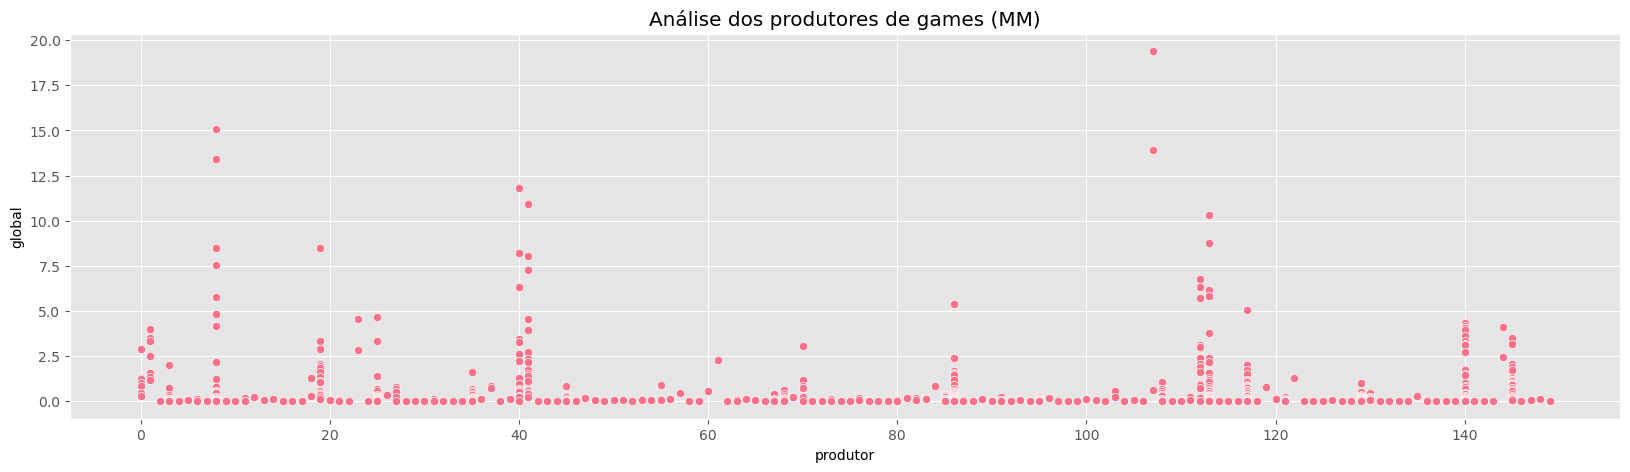

In [28]:
plt.figure(figsize=(20,5))
plt.title("Análise dos produtores de games (MM)")
sns.scatterplot(data=base_dados, x='produtor', y='global', color=paleta_cores[0]);

In [29]:
base_dados.groupby(by=['publisher', 'year']).sum()['global'].reset_index().set_index('year')

,publisher,global
year,,
2015.0,2K Games,2.29
2016.0,2K Games,5.74
2013.0,2K Sports,1.54
2014.0,2K Sports,3.65
2015.0,2K Sports,3.98
...,...,...
2017.0,Wired Productions,0.03
2018.0,Wired Productions,0.02
2016.0,Xseed Games,0.08


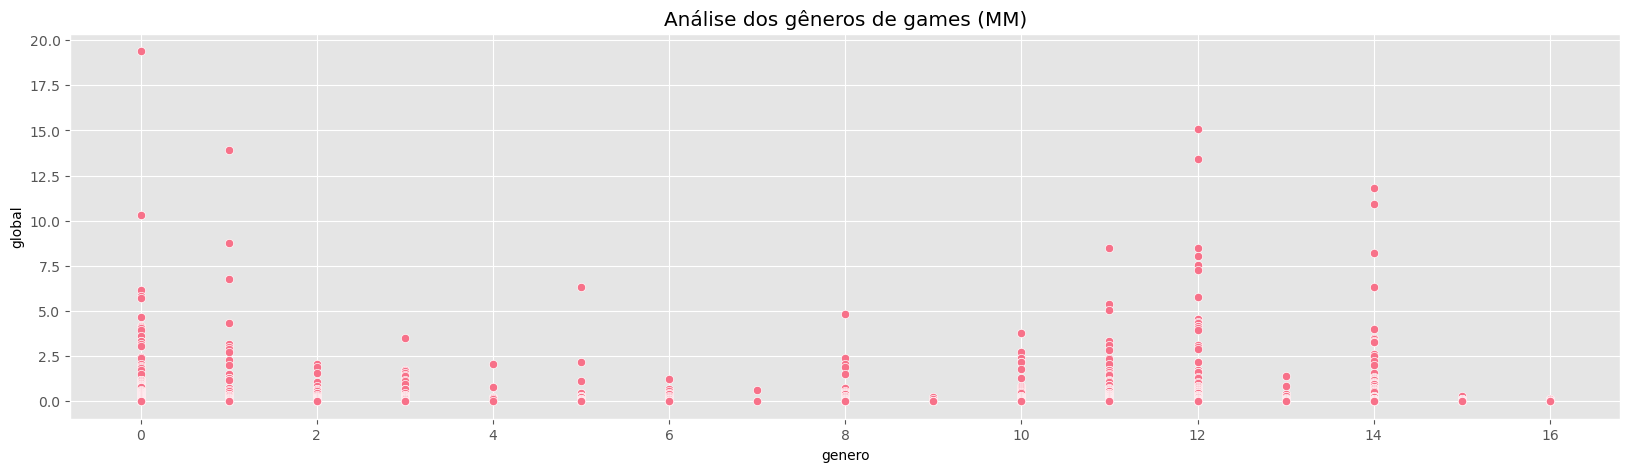

In [30]:
plt.figure(figsize=(20,5))
plt.title("Análise dos gêneros de games (MM)")
sns.scatterplot(data=base_dados, x='genero', y='global', color=paleta_cores[0]);

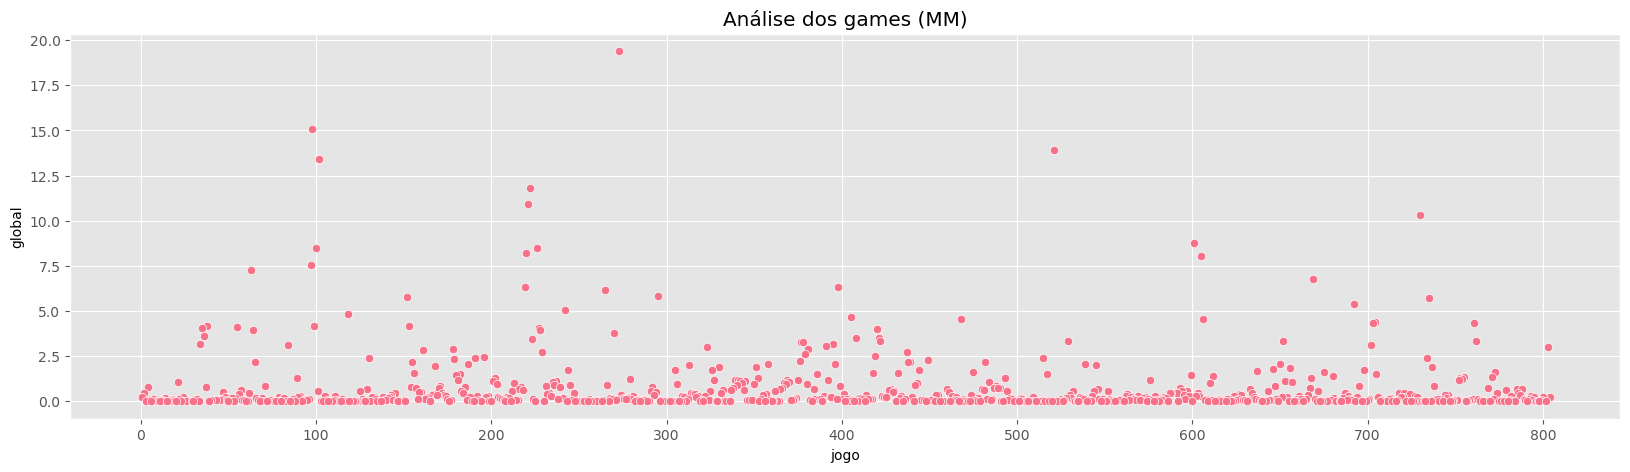

In [31]:
plt.figure(figsize=(20,5))
plt.title("Análise dos games (MM)")
sns.scatterplot(data=base_dados, x='jogo', y='global', color=paleta_cores[0]);

# Fazendo um relatório gerencial

<Axes: >

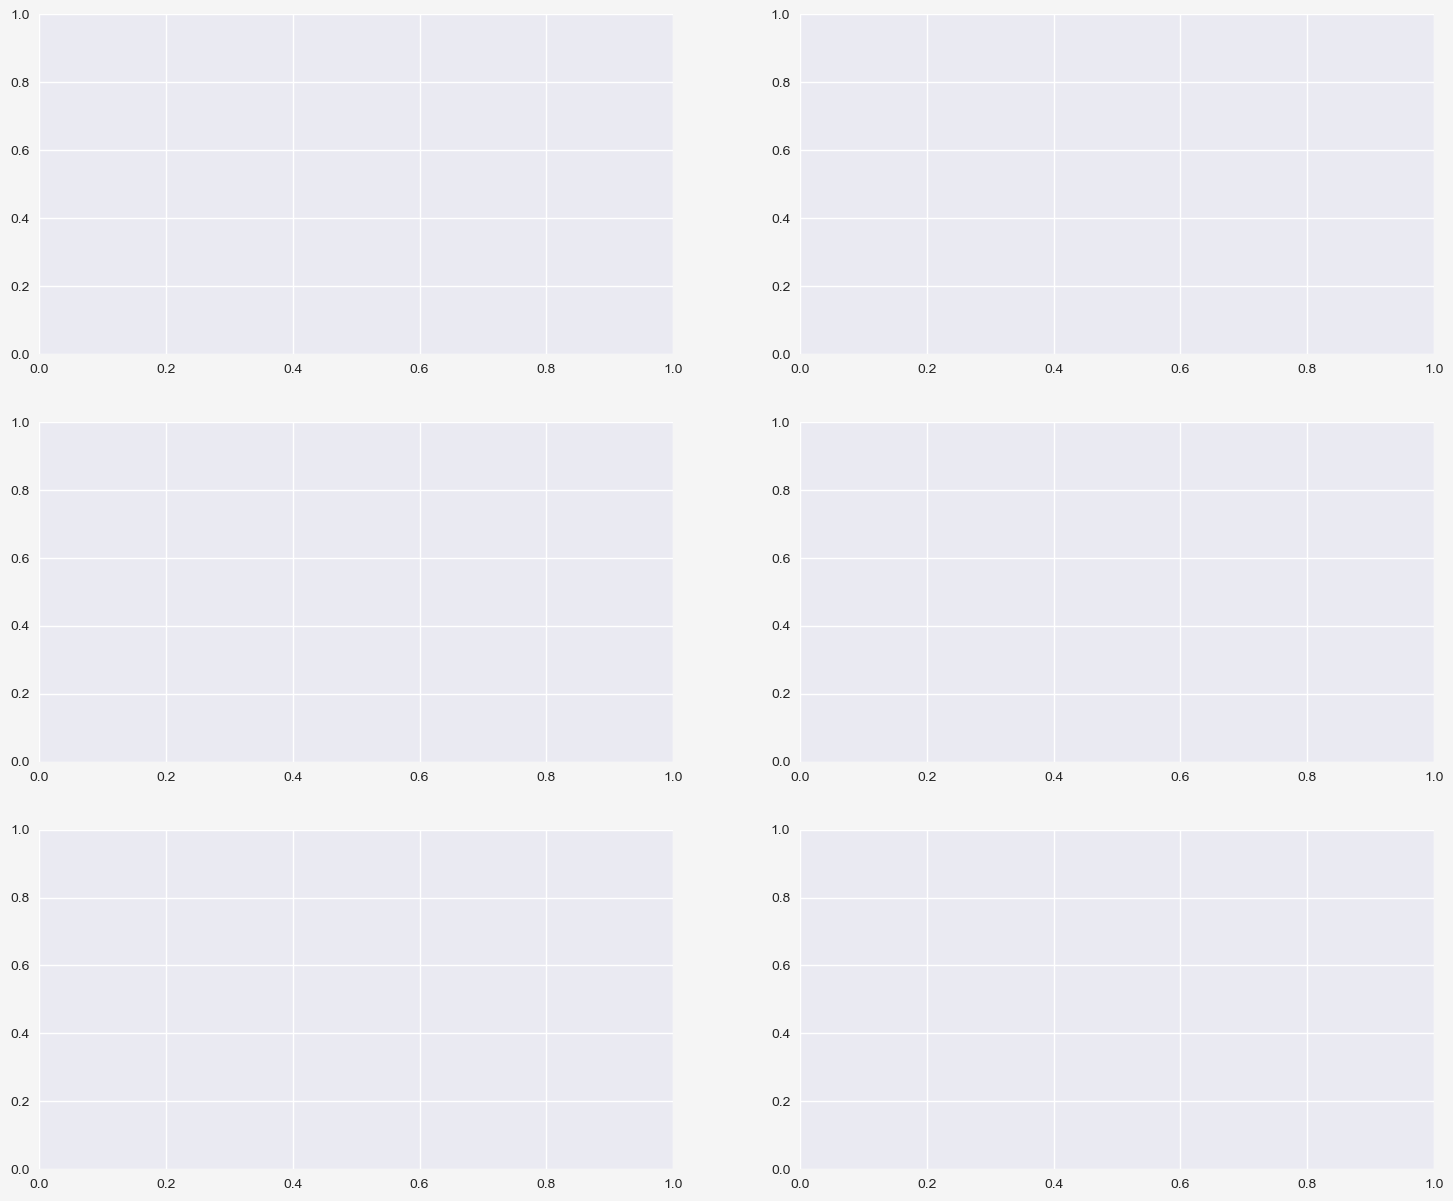

In [36]:
# Desenvolvendo um sistema de grids para o matplotlib

# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15))

# Cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos gráficos
plt.style.use('seaborn')

# Parâmetros para o grid
linhas = 3
colunas = 2

# Acessando o gráfico 1
plt.subplot(linhas, colunas, 1)

# Acessando o gráfico 2
plt.subplot(linhas, colunas, 2)

# Acessando o gráfico 3
plt.subplot(linhas, colunas, 3)

# Acessando o gráfico 4
plt.subplot(linhas, colunas, 4)

# Acessando o gráfico 5
plt.subplot(linhas, colunas, 5)

# Acessando o gráfico 6
plt.subplot(linhas, colunas, 6)